# Intro

En estas líneas veremos como realizar visualizaciones clave que nos vendrán bien en muchos contextos gracias a la librería plotly. Gráficos de líneas, de dispersión, area, barras, ... todo un mundo que podéis explorar en: https://plotly.com/python/

![logo](./img/plotly.png)

In [1]:
# !pip install plotly
# !pip install wordcloud

# En algunos casos os pedirá también
# !pip install nbformat>5 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

In [33]:
import os

print(os.listdir("./data"))

['school_earnings.csv', 'tips.csv', 'timesData.csv']


# Times data

In [4]:
timesData = pd.read_csv("./data/timesData.csv")

In [5]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [6]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [7]:
timesData['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016])

# Gráficos de líneas

Mostremos las citaciones y valor en Teaching para las universidades en el work rank top 100
* Import graph_objs as *go*
* Trazas
    * x = eje x
    * y = eje y
    * mode = tipo de linea: con marcadores, solo marcadores, etc...
    * name = nombre del plot
    * marker = opciones en modo diccionario
        * color = color de la linea. Valores RGB (red, green, blue) and opacidad (alpha)
    * text = Testo cuando pasamos con el ratón por encima
* data = los datos como tal
* layout = diccionario
    * title = título del gráfico
    * xaxis = diccionario que contiene
        * title = título del eje
        * ticklen = la legenda de los ticks del eje
* fig = data y layout
* iplot() = enseña el gráfico

In [8]:
# import graph objects as "go"
import plotly.graph_objs as go

# prepare data frame
df = timesData.iloc[:100,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df['world_rank'],
                    y = df['citations'],
                    name = 'citations',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = df['university_name'])

# Creating trace2
trace2 = go.Scatter(
                    x = df['world_rank'],
                    y = df['teaching'],
                    name = 'teaching',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = df['university_name'])

data = [trace1, trace2]

layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
             xaxis= dict(title= 'World Rank',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

# Scatter

Ejemplo scatter: Citas vs ranking top 100 universidades para los años 2014, 2015 y 2016

In [9]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
df2016['world_rank'] = df2016['world_rank'].str.replace('=','')

df2014['world_rank'] = df2014['world_rank'].astype(int)
df2015['world_rank'] = df2015['world_rank'].astype(int)
df2016['world_rank'] = df2016['world_rank'].astype(int)

# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)

data = [trace1, trace2, trace3]

layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
# fig = go.Figure(data = data, layout=layout)

iplot(fig)

# Bar Charts

Ejemplo barcharts: citas vs posición en el ranking


In [10]:
help(go.Bar)

Help on class Bar in module plotly.graph_objs._bar:

class Bar(plotly.basedatatypes.BaseTraceType)
 |  Bar(arg=None, alignmentgroup=None, base=None, basesrc=None, cliponaxis=None, constraintext=None, customdata=None, customdatasrc=None, dx=None, dy=None, error_x=None, error_y=None, hoverinfo=None, hoverinfosrc=None, hoverlabel=None, hovertemplate=None, hovertemplatesrc=None, hovertext=None, hovertextsrc=None, ids=None, idssrc=None, insidetextanchor=None, insidetextfont=None, legend=None, legendgroup=None, legendgrouptitle=None, legendrank=None, legendwidth=None, marker=None, meta=None, metasrc=None, name=None, offset=None, offsetgroup=None, offsetsrc=None, opacity=None, orientation=None, outsidetextfont=None, selected=None, selectedpoints=None, showlegend=None, stream=None, text=None, textangle=None, textfont=None, textposition=None, textpositionsrc=None, textsrc=None, texttemplate=None, texttemplatesrc=None, uid=None, uirevision=None, unselected=None, visible=None, width=None, widthsr

In [11]:
# prepare data frames
primeras = 3
año = 2014

df2014 = timesData[timesData.year == año].iloc[:primeras,:]

# create trace1 
trace1 = go.Bar(x = df2014['university_name'],
               y = df2014['citations'],
               name = 'citations',
               marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = df2014['country'])

trace2 = go.Bar(x = df2014['university_name'],
               y = df2014['teaching'],
               name = 'teaching',
               marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = df2014['country'])

data = [trace1, trace2]

layout = go.Layout(barmode = "group")

fig = go.Figure(data = data, layout = layout)

iplot(fig)


Segundo ejemplo

In [12]:
# prepare data frames
df2014 = timesData[timesData.year == año].iloc[:primeras,:]

x = df2014.university_name

trace1 = {
    'x': x,
    'y': df2014['citations'],
    'name': 'citation',
    'type': 'bar'
}

trace2 = {
    'x': x,
    'y': df2014['teaching'],
    'name': 'teaching',
    'type': 'bar'
}

data = [trace1, trace2]

layout = {
    'xaxis': {'title': 'Top 3 unis'},
    'barmode': 'group',
    'title': 'Citations and teaching top 3 unis'
}

fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Pie Charts

Ejemplo Pie chart: Numero de estudiantes para el Top 7 en el 2016

In [13]:
help(go.Pie)

Help on class Pie in module plotly.graph_objs._pie:

class Pie(plotly.basedatatypes.BaseTraceType)
 |  Pie(arg=None, automargin=None, customdata=None, customdatasrc=None, direction=None, dlabel=None, domain=None, hole=None, hoverinfo=None, hoverinfosrc=None, hoverlabel=None, hovertemplate=None, hovertemplatesrc=None, hovertext=None, hovertextsrc=None, ids=None, idssrc=None, insidetextfont=None, insidetextorientation=None, label0=None, labels=None, labelssrc=None, legend=None, legendgroup=None, legendgrouptitle=None, legendrank=None, legendwidth=None, marker=None, meta=None, metasrc=None, name=None, opacity=None, outsidetextfont=None, pull=None, pullsrc=None, rotation=None, scalegroup=None, showlegend=None, sort=None, stream=None, text=None, textfont=None, textinfo=None, textposition=None, textpositionsrc=None, textsrc=None, texttemplate=None, texttemplatesrc=None, title=None, titlefont=None, titleposition=None, uid=None, uirevision=None, values=None, valuessrc=None, visible=None, **kwa

In [14]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [int(each.replace(',', '')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name

# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": 0.3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.13,
                "y": 1.1
            },
        ]
    }
}
iplot(fig)

# Bubble Charts

Bubble Charts Example: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016

In [15]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              7 non-null      object 
 1   university_name         7 non-null      object 
 2   country                 7 non-null      object 
 3   teaching                7 non-null      float64
 4   international           7 non-null      object 
 5   research                7 non-null      float64
 6   citations               7 non-null      float64
 7   income                  7 non-null      object 
 8   total_score             7 non-null      object 
 9   num_students            7 non-null      object 
 10  student_staff_ratio     7 non-null      float64
 11  international_students  7 non-null      object 
 12  female_male_ratio       6 non-null      object 
 13  year                    7 non-null      int64  
dtypes: float64(4), int64(1), object(9)
memory usa

In [16]:
num_students_size  = [int(each.replace(',', ''))/1000 for each in df2016.num_students]
# num_students_size

In [17]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [int(each.replace(',', ''))/1000 for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

data = [
    {
        'y': df2016['teaching'],
        'x': df2016['world_rank'],
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        'text': df2016['university_name']
    }
]

iplot(data)

# Histogram

Histograma del ratio de alumnos-personal en 2011 y 2012.

In [18]:
# prepare data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]
x2013 = timesData.student_staff_ratio[timesData.year == 2013]

trace1 = go.Histogram(x = x2011,
                     opacity = 0.9,
                     name = '2011',
                     marker = dict(color = 'rgba(171,50,96,0.6)'))

trace2 = go.Histogram(x = x2012,
                     opacity = 0.9,
                     name = '2012',
                     marker = dict(color = 'rgba(12,50,196,0.6)'))

trace3 = go.Histogram(x = x2013,
                     opacity = 0.9,
                     name = '2013',
                     marker = dict(color = 'rgba(80,90,196,0.6)'))

data = [trace1, trace2, trace3]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Word Cloud

Una representación habitual cuando disponemos de cadenas de texto o variables categóricas es presentarlas en un mapa donde aquellas que tienen una mayor ocurrencia son presentadas en una fuente más grande.

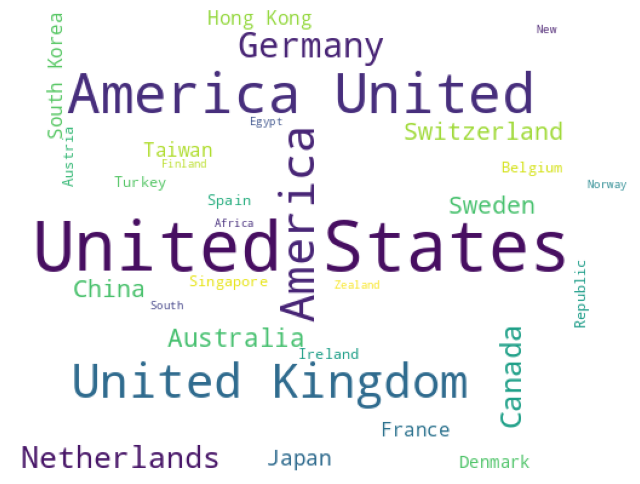

In [19]:
# data prepararion
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

# Box Plots

In [20]:
# data preparation
x2015 = timesData[timesData.year == 2015]
x2015['total_score'].unique()

array(['94.3', '93.3', '93.2', '92.9', '92.0', '91.9', '90.9', '89.5',
       '87.5', '87.1', '85.5', '84.6', '84.4', '83.0', '81.0', '80.9',
       '79.9', '79.4', '79.3', '79.2', '78.7', '76.1', '74.3', '73.3',
       '73.2', '72.8', '72.3', '71.9', '71.8', '71.2', '70.9', '70.4',
       '70.0', '69.9', '69.6', '69.4', '68.6', '67.8', '67.5', '66.8',
       '66.5', '65.9', '65.2', '65.1', '64.8', '64.7', '64.5', '64.1',
       '63.7', '63.6', '62.9', '62.8', '62.7', '62.2', '61.9', '61.3',
       '61.2', '61.1', '61.0', '60.7', '59.8', '59.6', '59.2', '59.1',
       '59.0', '58.9', '58.4', '58.2', '58.1', '58.0', '57.9', '57.6',
       '57.3', '56.9', '56.6', '56.5', '56.4', '56.2', '56.1', '55.5',
       '55.3', '55.2', '55.1', '54.6', '54.3', '54.0', '53.9', '53.8',
       '53.7', '53.6', '53.4', '53.2', '53.1', '53.0', '52.9', '52.8',
       '52.7', '52.6', '52.5', '52.4', '52.1', '52.0', '51.9', '51.6',
       '51.4', '51.2', '51.1', '51.0', '50.9', '50.5', '50.4', '50.3',
      

In [21]:
x2015['total_score'] = x2015['total_score'].str.replace('-','0')
x2015['total_score'] = x2015['total_score'].astype(float)
x2015.dtypes

/tmp/ipykernel_19455/682674248.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19455/682674248.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score               float64
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [22]:
trace0 = go.Box(y = x2015['total_score'],
                name = 'Total score in 2015')

trace1 = go.Box(y = x2015['research'],
                name = 'Total research in 2015')


data = [trace0, trace1]
iplot(data)

# Scatter Matrix Plots

Scatter Matrix = nos ayuda a entender la relación entre variables y su covarianza.

In [23]:
# data2015['international'] = data2015['international'].str.replace('-','0')
# data2015['total_score'] = data2015['total_score'].str.replace('-','0')
# data2015['international'] = data2015['international'].astype(float)
# data2015['total_score'] = data2015['total_score'].astype(float)
# data2015.dtypes

In [24]:
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["new_world_rank"] = np.arange(1,len(data2015)+1)

data2015['international'] = data2015['international'].str.replace('-','0')
data2015['total_score'] = data2015['total_score'].str.replace('-','0')
data2015['international'] = data2015['international'].astype(float)
data2015['total_score'] = data2015['total_score'].astype(float)

In [25]:
data2015

,research,international,total_score,new_world_rank
1402,98.1,67.0,94.3,1
1403,98.6,67.6,93.3,2
1404,97.7,90.7,93.2,3
1405,96.7,69.0,92.9,4
1406,95.6,87.8,92.0,5
...,...,...,...,...
1798,16.3,43.1,0.0,397
1799,27.5,36.0,0.0,398
1800,22.4,50.1,0.0,399
1801,17.4,33.1,0.0,400


In [26]:
# import figure factory
import plotly.figure_factory as ff


# scatter matrix
fig = ff.create_scatterplotmatrix(data2015,
                                 diag = 'box',
                                 index ='new_world_rank',
                                 colormap = 'Portland',
                                 height = 700,
                                 width = 700)

iplot(fig)

# Inset Plots

Plots empotrados sobre otro plot de manera que complementen la información general.

In [27]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)

# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]

layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


# 3D Scatter Plot with Colorscaling

Disponemos de tres ejes sobre los que presentar las agrupaciones que realicemos.

In [28]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(x = dataframe['world_rank'],
                     y = dataframe['research'],
                     z = dataframe['citations'],
                     mode = 'markers',
                     marker = dict(size = 5, color = 'rgb(255,0,0)'))

data = [trace1]
layout = go.Layout()

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Multiple Subplots

Podemos presentar más de una imagen dentro de la misma figura, tal como hacíamos con matplolib.

In [29]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    xaxis='x1',
    yaxis='y1',
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45],
        anchor='y1'
    ),
    yaxis=dict(
        domain=[0, 0.45],
        anchor='x1'
    ),
    xaxis2=dict(
        domain=[0.55, 1],
        anchor='y2'
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1],
        anchor='x3'
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Mapa mundial

En otros casos disponemos de información relativa a la ubicación de la información y queremos presentarla con un fondo relativo a la geografía que representa.

In [30]:
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,University of Arizona,United States of America,52.4,21.9,52.2,70.1,84.2,57.3,"36,429",12.7,8%,52 : 48,2011
96,95,University of Basel,Switzerland,50.2,91.3,37.1,78.3,45.8,57.3,"12,551",17.3,24%,54 : 46,2011
97,98,"University of Maryland, College Park",United States of America,45.4,35.4,48.6,79.2,-,57.2,"31,331",8.4,9%,48 : 52,2011
98,99,Dartmouth College,United States of America,44.7,31.0,49.2,79.7,-,57.1,"6,178",6.6,16%,47 : 53,2011


In [31]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     projection="natural earth")
fig.show()

# Exportar a HTML

Por último, siempre podremos exportar las figuras a un formato reproducible. Tened en cuenta que los formatos estáticos (PDF, JPEG, etc.) no nos permitirán disponer de la misma interacción que por ejemplo HTML.

In [32]:
fig.write_html("Mapa.html")